# Overview
This is my attempt to solve the challenge

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns 

In [34]:
wd = os.getcwd()
train_file = os.path.join(wd, "train.csv")
test_file = os.path.join(wd, 'test.csv')

In [35]:
df_train_org= pd.read_csv(train_file)
df_test_org = pd.read_csv(test_file)

In [36]:
df = df_train_org.copy()
df_test = df_test_org.copy()

In [37]:
import copy
# a function to drop an element to both train and test dataframes
def drop_cols(cols):
    global df, df_test
    
    if isinstance(cols, str):
        df = df.drop(cols, axis=1)
        df_test = df_test.drop(cols, axis=1)
    else:
        for col in cols:
            df = df.drop(col, axis=1)
            df_test = df_test.drop(col, axis=1)

In [38]:
def replace_values(col_names:list , wrong_correct:list):
    assert (isinstance(col_names, str) and isinstance(wrong_correct, dict)) or all([isinstance(l, dict) for l in wrong_correct]) and isinstance(col_names, list) 
    
    global df, df_test
    
    if isinstance(col_names, str):
        for k, v in wrong_correct.items():
            df = df.replace(k, v)
            df_test = df_test.replace(k, v)
        return 
    
    else:
        for col, dic in zip(col_names, wrong_correct):
            for k, v in dic.items():
                df = df.replace(k, v)
                df_test = df_test.replace(k, v)

In [39]:
def new_col_names(old_new_names:dict):
    global df, df_test
    try:    
        df = df.rename(columns=old_new_names)
        df_test = df_test.rename(columns=old_new_names)
    except:
        df_no_col = [col for col in old_new_names.keys if col not in df.columns]
        df_test_no_col = [col for col in old_new_names.keys if col not in df_test.columns]
        print("{cols} are not in the {dataf}".format(df_no_col, "training dataset"))
        print("{cols} are not in the {dataf}".format(df_test_no_col, "test dataset"))


In [40]:
df.info()
df = df.set_index('row_id')
df_test = df_test.set_index('row_id')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70128 entries, 0 to 70127
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   row_id    70128 non-null  int64 
 1   date      70128 non-null  object
 2   country   70128 non-null  object
 3   store     70128 non-null  object
 4   product   70128 non-null  object
 5   num_sold  70128 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 3.2+ MB


In [46]:
new_col_names({"num_sold": "y"})
y_train = df['y'].copy()

In [47]:
def feature_types():
    global df, df_test
    # using the dataframe version before the numerical encoding
    num = df.select_dtypes(np.number).columns.values.tolist()
    cat = df.select_dtypes(['category', 'object']).columns.values.tolist()
    return num, cat

In [48]:
num, cat = feature_types()
print(num)
print(cat)

for col in cat:
    print(df[col].value_counts())

# the data is balanced in every aspect.

['y']
['date', 'country', 'store', 'product']
2017-01-01    48
2019-09-10    48
2019-09-08    48
2019-09-07    48
2019-09-06    48
              ..
2018-05-01    48
2018-04-30    48
2018-04-29    48
2018-04-28    48
2020-12-31    48
Name: date, Length: 1461, dtype: int64
Belgium    11688
France     11688
Germany    11688
Italy      11688
Poland     11688
Spain      11688
Name: country, dtype: int64
KaggleMart    35064
KaggleRama    35064
Name: store, dtype: int64
Kaggle Advanced Techniques          17532
Kaggle Getting Started              17532
Kaggle Recipe Book                  17532
Kaggle for Kids: One Smart Goose    17532
Name: product, dtype: int64


## understand the target variable
It is time to understand the target variable

<AxesSubplot:xlabel='y', ylabel='Count'>

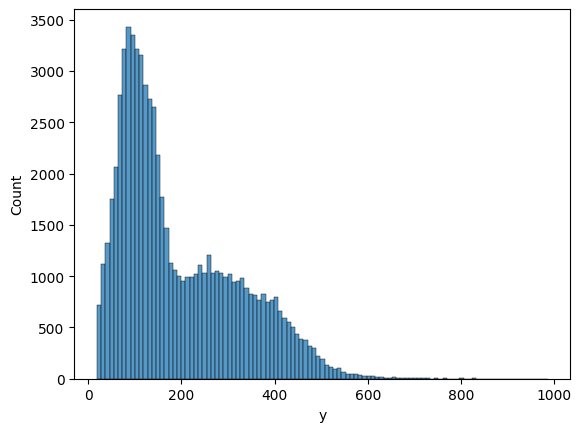

In [49]:
sns.histplot(y_train)

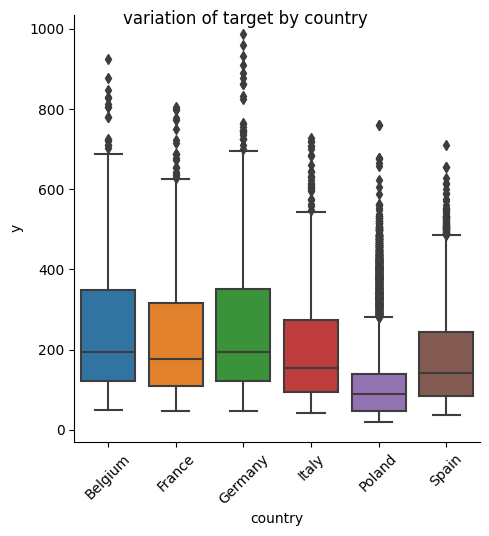

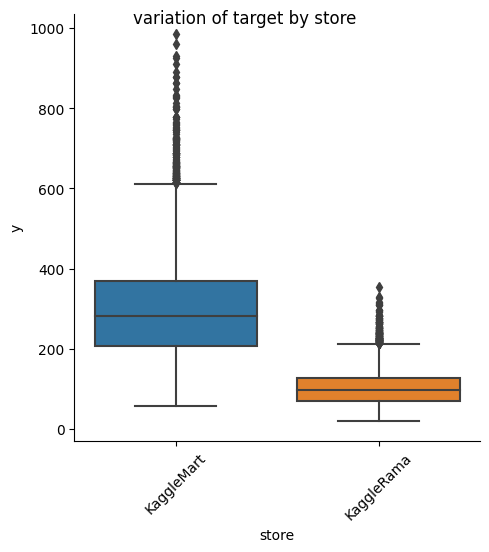

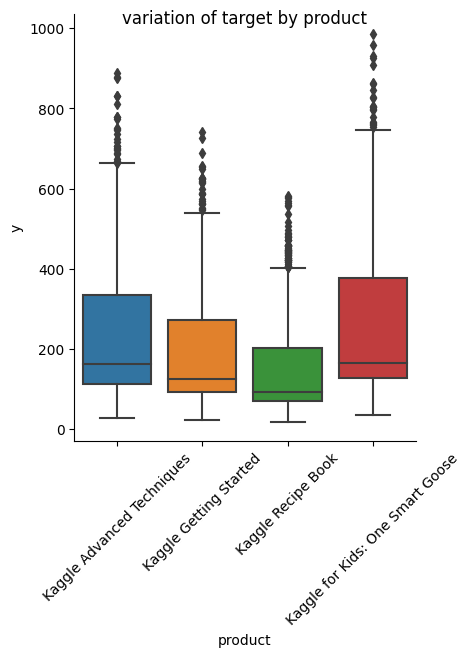

In [59]:
def vis_target_by_col(c):
    global df
    g = sns.catplot(data=df, x=c, y='y', kind='box')
    g.fig.suptitle(f'variation of target by {c}')
    plt.xticks(rotation=45)
    plt.show()

for c in cat[1:]:
    vis_target_by_col(c)

In [63]:
# I realized the names constitue a hustle to write every time
# let's simplify them
names_dict = {"store": "s", "product":"p", "country":"c", "date":"d"}
new_col_names(names_dict)


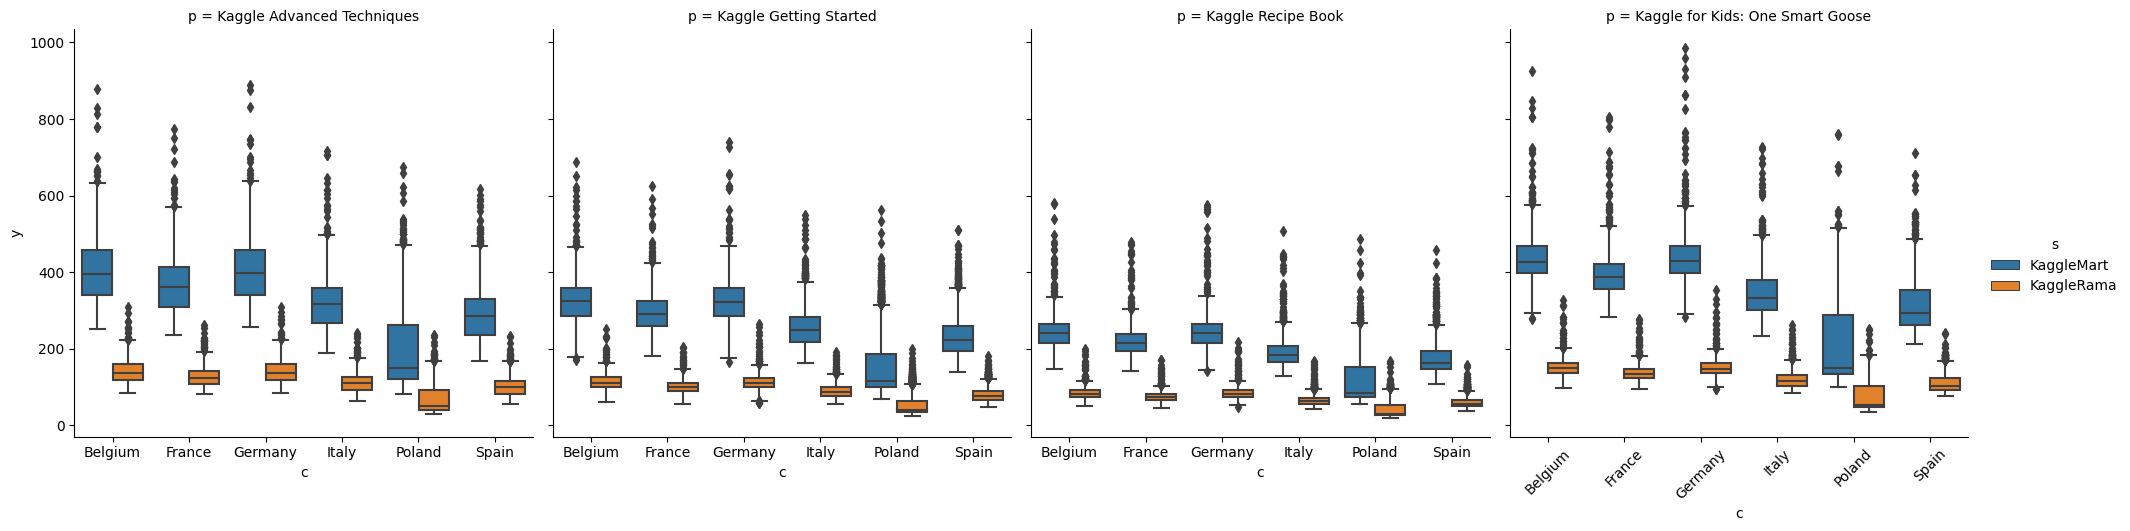

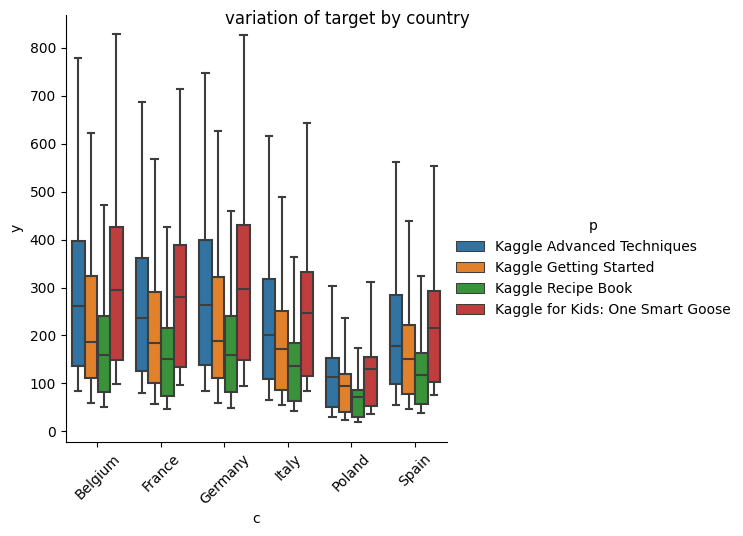

In [70]:
# display the number of books with respect to both country and book store
g = sns.catplot(data=df, x='c', y='y', kind='box', hue='s', col='p')
# g.fig.suptitle(f'variation of target by country')
plt.xticks(rotation=45)
plt.show()

# display the number of books with respect to country and product


g = sns.catplot(data=df, x='c', y='y', kind='box', hue='p', sym='')
g.fig.suptitle(f'variation of target by country')
plt.xticks(rotation=45)
plt.show()

The main conclusions: 
* KaggleMart sells significantly more books than KaggleRama
* The countries can be ordered in descending order of interest in Kaggle books:
1. Germany
2. Belgium
3. FRance
4. Itlay
5. Spain
6. Poland
* The products can be ordered in descending order of popularity:
1. Kaggle for kids
2. Kaggle advanced Techniques
3. Kaggle Getting started
4. Kaggle Recipe book


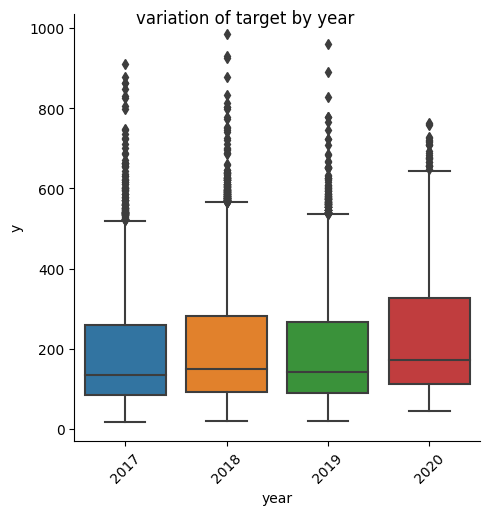

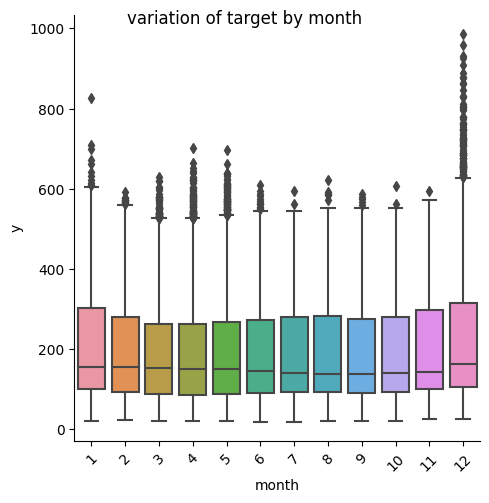

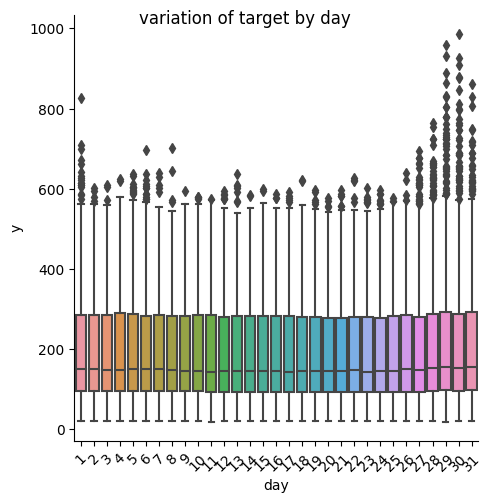

In [76]:
df['d'] = pd.to_datetime(df['d'])

year = 'year'
month = 'month'
day = 'day'
time = 'time'
date_cols = [year, month, day]
def decompose_date(row):
    row[year] = row['d'].year
    row[month] = row['d'].month
    row[day] = row['d'].day
    return row

df =  df.apply(decompose_date, axis=1)
for d in date_cols:
    vis_target_by_col(d)

In [79]:
product_names = {"Kaggle Advanced Techniques": "a", "Kaggle Getting Started": "g", "Kaggle Recipe Book":"r", "Kaggle for Kids: One Smart Goose": "k"}
df['p']= df['p'].apply(product_names.get)

In [90]:
# let's set the number for 
def outlier_detect(values):
    sorted(values)
    Q1, Q3 = np.percentile(values, [25,75])
    IQR = Q3 - Q1
    lower_range = max(min(values), Q1 - (1.5 * IQR))
    upper_range = min(Q3 + (1.5 * IQR), max(values))
    return lower_range,upper_range

In [96]:
data_cols = ['d', year, month, day]
bounds_by_country = dict(zip(np.unique(df['c']), [outlier_detect(df[df['c'] == val]['y']) for val in np.unique(df['c'])]))

date_out_c = {}
def outliers_date_c():
    for c in np.unique(df['c']):
        df_c = df[df['c'] == c]
        df_out = df_c[(df_c['y'] > bounds_by_country[c][1]) | (df_c['y'] < bounds_by_country[c][0])]
        date_out_c[c] = df_out
 
outliers_date_c()       
# for c, b in bounds_by_country.items():
#     print(f"country : {c}: bounds: {b}")

In [ ]:
countries = df['c'].copy()
for c in np.unique(countries):
    print(f"Info for country: {str(c)}")
    for d_info in data_cols[1:]:
        print(date_out_c[c][d_info].value_counts())


The date will not be left as it is, It will be broken into year, month and day.
As the visualized previously, the distributions of data along each month, day are pretty much the same. Yet, the number of outliers varies remarkably. This the main point of focus in my encoding.

In [106]:
def encode_year():
    y_by_c = pd.pivot_table(df, index='c', values='y', aggfunc=[np.sum])
    print(y_by_c)
    y_by_c = y_by_c / y_by_c.sum()
    return dict(zip(y_by_c.index.values, y_by_c.values.squeeze()))
 
encode_year()

             sum
               y
c               
Belgium  2781050
France   2512319
Germany  2786415
Italy    2201092
Poland   1341545
Spain    2003238


{'Belgium': 0.2041038895806801,
 'France': 0.18438146734774444,
 'Germany': 0.20449763200444104,
 'Italy': 0.16154022348570443,
 'Poland': 0.09845725626921971,
 'Spain': 0.1470195313122103}

In [110]:
def encode_product(stat):
    # let's consider the country product aggregation
    tar_c_p = pd.pivot_table(df, index='c', columns='p', values='y', aggfunc=['median', 'mean']) # as the distribution is quite similar
    tar_c_p_2 = pd.pivot_table(df, index='c', values='y')
    tar_c_p['d1'] = tar_c_p[(stat, 'k')] - tar_c_p[(stat, 'a')]
    tar_c_p['d2'] = tar_c_p[(stat, 'a')] - tar_c_p[(stat, 'g')]
    tar_c_p['d3'] = tar_c_p[(stat, 'g')] - tar_c_p[(stat, 'r')]
    d1 = np.mean(tar_c_p['d1'])
    d2 = np.mean(tar_c_p['d2'])
    d3 = np.mean(tar_c_p['d3'])
    print(tar_c_p)

encode_product('mean')    

        median                             mean                          \
p            a      g      k      r           a           g           k   
c                                                                         
Belgium  261.0  187.0  294.0  159.5  273.388090  219.345311  294.698494   
France   237.0  183.5  279.5  150.5  247.183778  197.979466  266.457221   
Germany  263.0  187.5  296.5  160.0  273.936687  219.485284  295.545517   
Italy    201.5  171.0  247.5  136.5  216.640999  173.388433  233.471937   
Poland   113.0   95.0  131.0   71.0  131.520192  105.466461  143.200890   
Spain    178.0  150.5  215.5  117.0  196.792950  157.881588  212.563313   

                            d1         d2         d3  
p                 r                                   
c                                                     
Belgium  164.330595  21.310404  54.042779  55.014716  
France   148.173854  19.273443  49.204312  49.805613  
Germany  164.631075  21.608830  54.451403  54.854